In [ ]:
from itertools import count
from turtle import color
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from urllib.request import urlretrieve
from matplotlib import scale
import pandas as pd
import numpy as np
import csv
import math
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as  mat
import seaborn as sea
import os
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, export_text
import time

In [ ]:
data_dir='/content/drive/MyDrive/weatherAUS.csv'
os.listdir(os.path.dirname(data_dir))
raw_df=pd.read_csv(data_dir)
raw_df.info()
raw_df.describe()
raw_df.dropna(subset='RainTomorrow', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
train_val_data, test_data=train_test_split(raw_df,test_size=0.2, random_state=42)
train_data, val_data=train_test_split(train_val_data, test_size=0.25, random_state=42)
train_data.shape
test_data.shape
val_data.shape

(28439, 23)

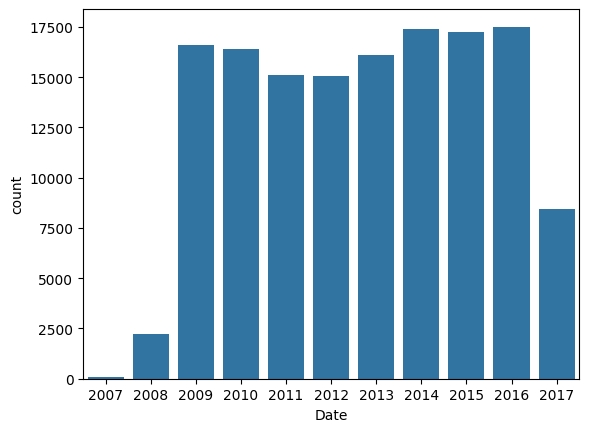

In [ ]:
years=pd.to_datetime(raw_df['Date']).dt.year
sea.countplot(x=years)
test_data=raw_df[years>2015]
train_data=raw_df[years<2015]
val_data=raw_df[years==2015]

In [ ]:
input_cols=list(raw_df.columns[1:-1 ])
target_cols='RainTomorrow'
nouse_cols=list(raw_df.columns[0])

In [ ]:
train_inputs=train_data[input_cols].copy()
train_target=train_data[target_cols].copy()
test_inputs=test_data[input_cols].copy()
test_target=test_data[target_cols].copy()
val_inputs=val_data[input_cols].copy()
val_target=val_data[target_cols].copy()

In [ ]:
imputer=SimpleImputer()
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.to_list()
categorical_cols=train_inputs.select_dtypes(include='object').columns.to_list()
train_inputs[categorical_cols].describe()
imputer.fit(raw_df[numeric_cols])
list(imputer.statistics_)
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
val_target.isna().sum()

0

In [ ]:
scaler=preprocessing.MinMaxScaler()
scaler.fit(raw_df[numeric_cols])
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])

In [ ]:
raw_df[categorical_cols] = raw_df[categorical_cols].fillna('missing')
train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('missing')
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna('missing')
val_inputs[categorical_cols] = val_inputs[categorical_cols].fillna('missing')

In [ ]:
encoder=preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])
names=list(encoder.get_feature_names_out(categorical_cols))
raw_df[categorical_cols].nunique().sum()

103

In [ ]:
#Base_Model
model=RandomForestClassifier(random_state=42, n_jobs=-1).fit(train_inputs, train_target)
model.predict(train_inputs)
model.score(train_inputs, train_target)
model.score(val_inputs,val_target)


0.8566537055307295

In [ ]:
#Base_Model
model1=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(train_inputs, train_target)
model1.predict(train_inputs)
model1.score(train_inputs, train_target)
model1.score(val_inputs,val_target)

0.8577563693343393

In [ ]:
def Estimator(est):
  model=RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=est).fit(train_inputs, train_target)
  train=1-model.score(train_inputs, train_target)
  val=1-model.score(val_inputs, val_target)
  return {'No. of estimators':est, 'Training_Error':train, 'Validation_Error':val}

for i in range(50, 201):
  esti=pd.DataFrame(Estimator(i) for i in range(50,100))
  esti

esti


In [ ]:
from matplotlib import pyplot as plt
esti.plot(kind='scatter', x='No. of estimators', y='Training_Error', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)